<a href="https://colab.research.google.com/github/Parveen2327/TCW-RPGP-DS01-02/blob/main/Phase_1_Test_DSRPGP02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
df=pd.read_csv('saas.csv')

In [36]:
df.dtypes

,0
customer_id,object
company_name,object
contact_email,object
country,object
city,object
industry,object
company_size,object
team_size,float64
subscription_plan,object
monthly_revenue,float64


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_id                  10000 non-null  object 
 1   company_name                 9541 non-null   object 
 2   contact_email                10000 non-null  object 
 3   country                      10000 non-null  object 
 4   city                         10000 non-null  object 
 5   industry                     10000 non-null  object 
 6   company_size                 10000 non-null  object 
 7   team_size                    9697 non-null   float64
 8   subscription_plan            10000 non-null  object 
 9   monthly_revenue              10000 non-null  float64
 10  contract_length_months       10000 non-null  int64  
 11  signup_date                  10000 non-null  object 
 12  churn_date                   1872 non-null   object 
 13  is_churned       

In [38]:
df.describe()

,team_size,monthly_revenue,contract_length_months,days_active,monthly_usage_units,api_calls_per_month,login_frequency_per_month,support_tickets_total,customer_satisfaction_score,failed_payments,customer_acquisition_cost,feature_adoption_rate
count,9697.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9200.000000,10000.000000,7428.000000,10000.000000,10000.00000,10000.000000
mean,83.970816,126.707154,13.510100,364.013100,1513.059700,1877.464200,40.288478,1.514800,3.592851,0.310800,100.52057,0.396801
std,127.448150,174.764872,12.504621,229.660188,1941.557801,2623.220225,28.380468,1.221528,0.924555,0.553023,71.21130,0.199954
min,1.000000,1.811260,1.000000,7.000000,0.000000,0.000000,0.500000,0.000000,1.000000,0.000000,0.35000,0.003000
25%,8.000000,28.280000,3.000000,165.000000,160.000000,157.000000,19.500000,1.000000,3.000000,0.000000,47.66000,0.239000
50%,22.000000,76.750000,6.000000,320.000000,789.000000,826.000000,34.000000,1.000000,3.700000,0.000000,84.35000,0.383000
75%,86.000000,133.907500,24.000000,563.000000,1793.250000,2277.500000,54.200000,2.000000,4.300000,1.000000,135.13250,0.541000
max,500.000000,4220.754592,36.000000,800.000000,10258.000000,17479.000000,302.100000,8.000000,5.000000,4.000000,583.40000,0.975000


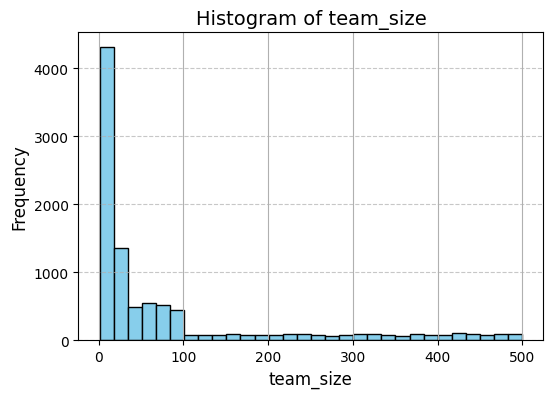

In [39]:
num_col = df.select_dtypes(include='number').columns[0]
plt.figure(figsize=(6,4))
df[num_col].dropna().hist(bins=30, color='skyblue', edgecolor='black')
plt.title(f"Histogram of {num_col}", fontsize=14)
plt.xlabel(num_col, fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

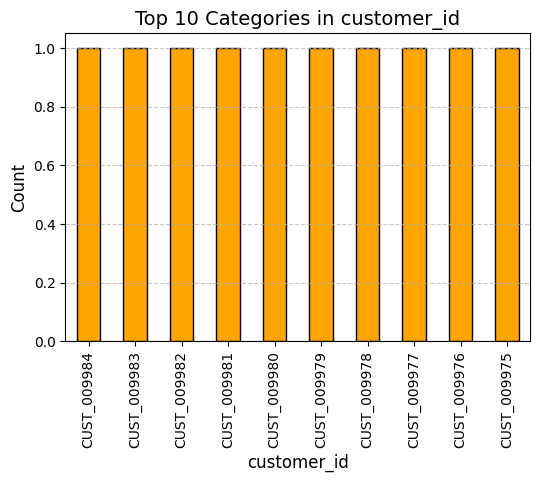

In [40]:
cat_col = df.select_dtypes(exclude='number').columns[0]
plt.figure(figsize=(6,4))
df[cat_col].value_counts().head(10).plot(kind='bar', color='orange', edgecolor='black')
plt.title(f"Top 10 Categories in {cat_col}", fontsize=14)
plt.xlabel(cat_col, fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [41]:
df.isnull().sum()

,0
customer_id,0
company_name,459
contact_email,0
country,0
city,0
industry,0
company_size,0
team_size,303
subscription_plan,0
monthly_revenue,0


In [42]:
threshold = 0.4
df = df.drop(columns=df.columns[df.isnull().mean() > threshold])
print("\nDropped columns with >40% missing values.")


Dropped columns with >40% missing values.


In [43]:
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(exclude='number').columns

In [44]:
from sklearn.impute import SimpleImputer

if len(num_cols) > 0:
    num_imputer = SimpleImputer(strategy='median')
    df[num_cols] = num_imputer.fit_transform(df[num_cols])
    print("Numeric columns imputed with median.")

Numeric columns imputed with median.


In [45]:
if len(cat_cols) > 0:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])
    print("Categorical columns imputed with most frequent value.")

Categorical columns imputed with most frequent value.


In [46]:
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
customer_id                    0
company_name                   0
contact_email                  0
country                        0
city                           0
industry                       0
company_size                   0
team_size                      0
subscription_plan              0
monthly_revenue                0
contract_length_months         0
signup_date                    0
is_churned                     0
days_active                    0
monthly_usage_units            0
api_calls_per_month            0
login_frequency_per_month      0
support_tickets_total          0
last_support_ticket_date       0
support_ticket_category        0
customer_satisfaction_score    0
payment_method                 0
failed_payments                0
acquisition_channel            0
customer_acquisition_cost      0
feature_adoption_rate          0
dtype: int64


I have dropped columns that were mostly empty because they didn’t have enough useful information.I filled missing numbers with the median so that extreme values wouldn’t affect the results and filled missing categories with the most common value to keep the data realistic without creating new ones.

In [47]:
num_col = df.select_dtypes(include='number').columns[0]
cat_col = df.select_dtypes(exclude='number').columns[0]

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[f"{cat_col}_label"] = le.fit_transform(df[cat_col]) # Categorical

In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[f"{num_col}_minmax"] = scaler.fit_transform(df[[num_col]]) # Numerical

In [50]:
from sklearn.decomposition import PCA

pca_features = [f"{cat_col}_label", f"{num_col}_minmax"]

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(df[pca_features])

print(f"PC1 explains {pca.explained_variance_ratio_[0]*100:.2f}% variance")
print(f"PC2 explains {pca.explained_variance_ratio_[1]*100:.2f}% variance")

PC1 explains 100.00% variance
PC2 explains 0.00% variance


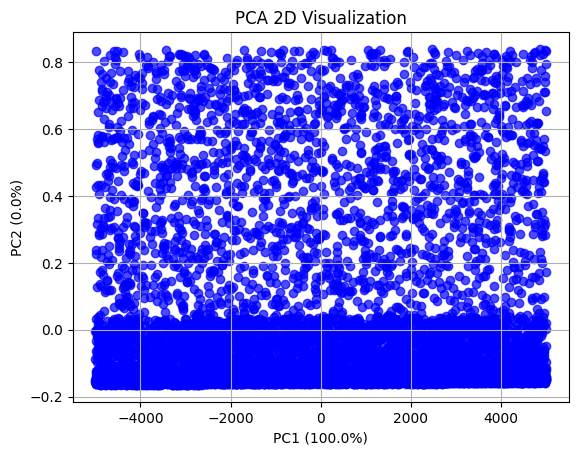

In [51]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, c='blue')
plt.title("PCA 2D Visualization")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.grid(True)
plt.show()

The numeric column’s histogram shows a **right-skewed** pattern, with most values small and a few large outliers.The **top 10 categories chart** highlights dominance by certain categories, showing an uneven feature distribution.
The **PCA plot** reveals moderate grouping, suggesting natural clusters within the data.
Overall, EDA has been performed with statistical summaries , visualizations , PCA , feature engineering and other methods notably.